In [2]:
# Import Standard Dependencies
import cv2
import os
# import randomx
import numpy as np
from matplotlib import pyplot as plt 

In [3]:
# Import tensorflow dependencies
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [4]:
# Setup Paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')


In [5]:
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

In [6]:
# Uncompress Tar GZ labeled faces in the wild dataset
# !tar -xf lfw.tgz
# This going to extract the data and put it to the same repository


In [15]:
# Move LFW images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)
        

In [16]:
# I have the collection of images of my data

In [72]:
# Get Image Directories

anchor = tf.data.Dataset.list_files(ANC_PATH+'\\*.jpg').take(500)
positive = tf.data.Dataset.list_files(POS_PATH+'\\*.jpg').take(500)
negative = tf.data.Dataset.list_files(NEG_PATH+'\\*.jpg').take(500)

In [7]:
dit_test = anchor.as_numpy_iterator()

In [8]:
dit_test.next()

b'data\\anchor\\augmented_70.jpg'

In [73]:
# Preprocessing

def preprocess(file_path):

    # Read in image from file path
    # byte_img = tf.io.read_file(file_path)
    # Load in the image
    # img = tf.io.decode_jpeg(byte_img)

    # Preprocessing steps - resizing the image to be 100x100px
    # img = tf.image.resize(img, (100,100))
    # Scaling the image to be between 0 and 1, changing the pixel value of the image
    # img = img/255.0

    # Return img
    # return img

    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (224, 224))
    # img = tf.cast(img, tf.float32) / 255.0
    img = tf.keras.applications.vgg16.preprocess_input(img)
    return img

In [10]:
img = preprocess('data\\anchor\\augmented_70.jpg')

In [12]:
img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ -97.15329 , -113.993286, -115.89429 ],
        [ -96.58186 , -113.42186 , -115.32286 ],
        [ -94.210686, -110.086395, -114.88026 ],
        ...,
        [  14.110741,   34.891914,   82.9271  ],
        [  15.134964,   36.29496 ,   88.71667 ],
        [  15.060997,   35.221   ,   91.32    ]],

       [[ -93.36758 , -110.20757 , -112.108574],
        [ -91.40329 , -107.243286, -112.14429 ],
        [ -89.789764, -105.62976 , -110.53076 ],
        ...,
        [   8.304604,   27.357445,   79.855675],
        [  13.346642,   33.50666 ,   89.45893 ],
        [  17.955132,   37.115135,   95.39271 ]],

       [[ -93.51043 , -109.38614 , -114.18    ],
        [ -90.72472 , -106.56471 , -111.46571 ],
        [ -89.90329 , -104.81344 , -111.574135],
        ...,
        [   9.957695,   27.22483 ,   85.21795 ],
        [   9.833916,   28.20823 ,   89.63499 ],
        [  14.453865,   32.649574,   94.64144 ]],

       ...,

     

In [74]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [12]:
samples = data.as_numpy_iterator()
example = samples.next()
np.array(data).shape


()

In [75]:
# Build Train and Test Partition
def preprocess_twin(input_img, validation_img, label):
    print(input_img)
    print(input_img)
    return(preprocess(input_img), preprocess(validation_img), label)

In [14]:
res = preprocess_twin(*example)

b'data\\anchor\\augmented_168.jpg'
b'data\\anchor\\augmented_168.jpg'


In [15]:
res

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[ -78.36758 ,  -80.207565,  -96.63153 ],
         [ -79.90329 ,  -81.065994,  -99.32158 ],
         [ -83.33186 ,  -86.479256, -104.622604],
         ...,
         [ -90.26045 , -107.136154, -114.965744],
         [ -87.18775 , -105.02775 , -110.92875 ],
         [ -84.72472 , -102.56471 , -108.46571 ]],
 
        [[ -70.36502 ,  -72.99074 ,  -86.21188 ],
         [ -73.32803 ,  -75.3466  ,  -90.18382 ],
         [ -76.731094,  -81.64252 ,  -95.28076 ],
         ...,
         [ -92.9033  , -106.779   , -117.57288 ],
         [ -90.44286 , -105.28286 , -113.18386 ],
         [ -87.54487 , -103.919304, -112.14556 ]],
 
        [[ -66.5538  ,  -73.27263 ,  -81.28714 ],
         [ -74.40967 ,  -80.934616,  -89.358574],
         [ -75.97344 ,  -83.66931 ,  -92.713165],
         ...,
         [ -94.83187 , -106.74457 , -117.64175 ],
         [ -93.83824 , -105.78538 , -116.57924 ],
         [ -92.845894, -104.18588 , -116.21572

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.500145..130.82126].


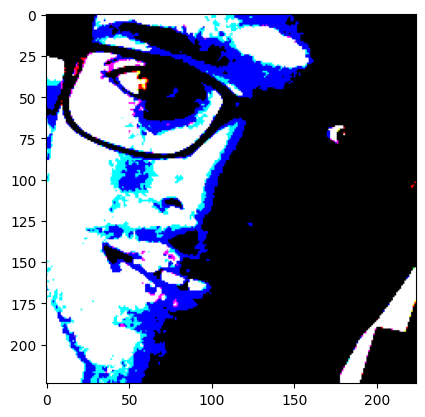

In [16]:
plt.imshow(res[1])

In [76]:
# Build data loader pipeline

data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

Tensor("args_0:0", shape=(), dtype=string)
Tensor("args_0:0", shape=(), dtype=string)


In [18]:
samples = data.as_numpy_iterator()

In [19]:
len(samples.next())

3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..131.11465].


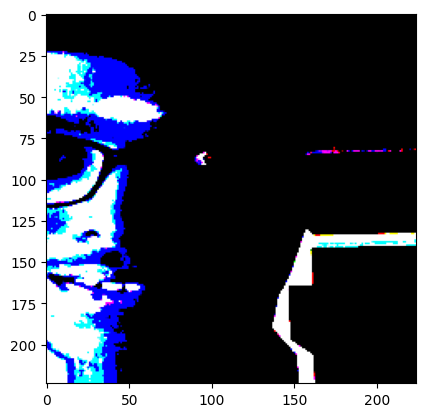

In [20]:
samp = samples.next()
plt.imshow(samp[0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.31007..150.47424].


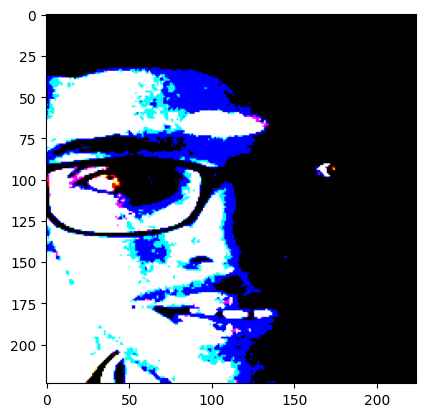

In [21]:
plt.imshow(samp[1])

In [22]:
samp[2]

1.0

In [23]:
len(data)

600

In [147]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(20)
train_data = train_data.prefetch(10)

In [183]:
round(3000*.7)

2100

In [25]:
train_sample = train_data.as_numpy_iterator()


In [26]:
train_sample = train_sample.next()

In [27]:
x = train_sample[:2]

In [28]:
np.array(x).shape

(2, 16, 224, 224, 3)

In [29]:
# Testing Partition
round(len(data)*.3)

180

In [148]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(20)
test_data = test_data.prefetch(10)

In [149]:
IMAGE_SIZE = [224,224]

In [150]:
# vggface = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3))
vgg = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [151]:
def make_embedding():
    
    x = vgg.output
    # x = GlobalAveragePooling2D()(x)
    # x = Dense(512, activation='relu')(x)
    # x = Dense(128, activation='relu')(x)
    # return Model(vggface.input, x, name='embedding')
    # Final embedding block
    # c4 = Conv2D(256, (4,4), activation='relu')(x)
    
    # c4 = Conv2D(256, (5,5), activation='relu')(vgg.output)
    # c4 = vgg.output
    
    # d1 = Dense(4096, activation='sigmoid')(f1)
    # c1 = Conv2D(512, (4,4),activation='relu')(x)
    c1 = Conv2D(256, (4,4),activation='relu')(x)
    f1 = Flatten()(c1)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    return Model(inputs = vgg.input, outputs=[d1], name='embedding')



In [152]:
embedding = make_embedding()

In [153]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 4, 4, 256)           │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,593,408 (128.15 MB)

 Trainable params: 18,878,720 (72.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [154]:
# Siamense L1 Distance Class
class L1Dist(Layer):

    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()

    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [155]:
def make_siamese_model():

    # Anchor image input in the network
    input_image = Input(name='imput_img', shape=(224,224,3))

    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(224,224,3))

    # Combine siemese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distance = siamese_layer(embedding(input_image)[0], embedding(validation_image)[0])

    # classifier layer
    classifier = Dense(1, activation='sigmoid')(distance)

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')
    

In [156]:
siamese_model = make_siamese_model()

In [138]:
# siamese_model.summary()

In [139]:
# Setup Loss and Optimizer

In [157]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [158]:
opt = tf.keras.optimizers.Adam(1e-4) #0.0001

In [159]:
# Establishing Check points

In [160]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [45]:
test_batch = train_data.as_numpy_iterator()

In [46]:
batch_1 = test_batch.next()

In [47]:
x = batch_1[:2]

In [48]:
y = batch_1[2]

In [49]:
y

array([0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.],
      dtype=float32)

In [161]:
@tf.function
def train_step(batch):

    # Record all of our operations
    with tf.GradientTape() as tape:

        # Get anchor and positive/negative image
        x = batch[:2]
        # Get label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(x, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)

    # calculate gadients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    # calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

    # return loss
    return loss

In [162]:
# Build Training Loop


In [163]:


def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))

        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)

        # Save Checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [164]:
EPOCHS = 20

In [165]:
train(train_data, EPOCHS)


 Epoch 1/20
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
35/35 ━━━━━━━━━━━━━━━━━━━━ 481s 13s/step

 Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 474s 14s/step

 Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 473s 14s/step

 Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 472s 13s/step

 Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 475s 14s/step

 Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 478s 14s/step

 Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 474s 14s/step

 Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 476s 14s/step

 Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 478s 14s/step

 Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 476s 14s/step

 Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 473s 14s/step

 Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 473s 14s/step

 Epoch 13/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 469s 13s/step

 Epoch 14/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 471s 14s/step

 Epoch 15/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 477s 14s/step

 Epoch 16/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 486s 14s/step

In [166]:
# Evaluate Model

In [167]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [168]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [169]:
# Make Prediction
y_hat = siamese_model.predict([test_input, test_val])
[1 if prediction > 0.5 else 0 for prediction in y_hat]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


[1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]

In [170]:
y_true

array([1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 1.], dtype=float32)

In [171]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall/Precision result
m.result().numpy()


1.0

In [172]:
# Creating a metric object
m = Precision()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall/Precision result
m.result().numpy()

1.0

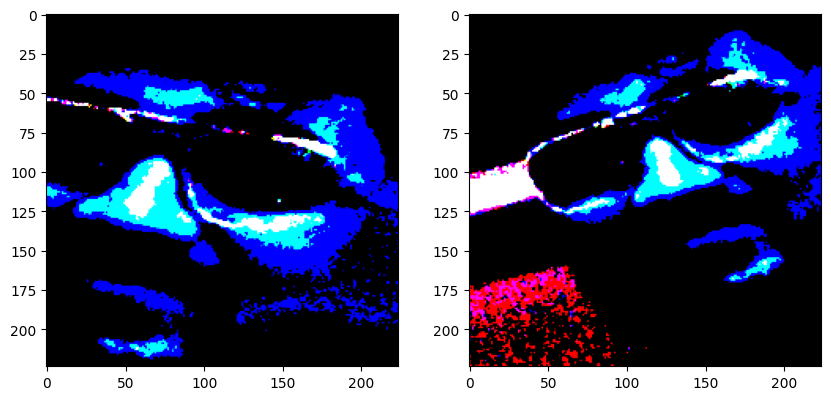

In [173]:
# Set Plot Size
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[5])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[5])

# Renders cleanly
plt.show()

In [174]:
# Save weights
siamese_model.save('facenet_siamesemodel.h5')

In [44]:
model = tf.keras.models.load_model('facenet_siamesemodel.h5', 
                                  custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [180]:
y_hat = model.predict([test_input, test_val])
[1 if prediction > 0.5 else 0 for prediction in y_hat]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


[1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]

In [181]:
y_true

array([1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 1.], dtype=float32)

In [36]:
siamese_model = tf.keras.models.load_model('facenet_siamesemodel.h5', 
                                  custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [65]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)



In [66]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [211]:
@tf.function
def train_step(batch):

    # Record all of our operations
    with tf.GradientTape() as tape:

        # Get anchor and positive/negative image
        x = batch[:2]
        # Get label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(x, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)

    # calculate gadients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    # calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

    # return loss
    return loss

In [212]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))

        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)

        # Save Checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [71]:
EPOCHS = 20

In [ ]:
train(train_data, EPOCHS)

In [85]:
# Verification Function

In [175]:
from mtcnn import MTCNN

In [176]:
mtcnn_detector = MTCNN()

In [39]:
def preprocessing(image, detection):
    if len(detection) == 1:
        x, y, width, height = detection[0]['box']
    else:
        x, y, width, height = detection['box']
    x, y = abs(x), abs(y)
    face = image[y:y+height, x:x+width]
    
    if face.shape[0] == 0 or face.shape[1] == 0:
        print(f"Invalid face region: {face.shape}")
        return None
        
    # image = tf.image.resize(face, (224, 224))
    image = cv2.resize(np.array(face), (224, 224))
    return tf.keras.applications.vgg16.preprocess_input(image)
        

In [177]:
# Specify file path for the input image
input_img_path = os.path.join('test', 't4.jpeg')

# # Read and decode the input image

# byte_img = tf.io.read_file(input_img_path)
# image = tf.io.decode_jpeg(byte_img)
input_img = cv2.imread(input_img_path)
input_img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

# Detect faces in the input image
input_detection = mtcnn_detector.detect_faces(input_img_rgb)
len(input_detection)

# for detection in input_detections:
input_face = preprocessing(input_img_rgb, input_detection)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [182]:
result_paths = []

validation_dir = 'lfw'
for val_img_name in os.listdir(validation_dir):
    val_img_path = os.path.join(validation_dir, val_img_name)
    # val_byte_img = tf.io.read_file(val_img_path)
    # val_image = tf.io.decode_jpeg(val_byte_img)
    val_img = cv2.imread(val_img_path)
    val_img_rgb = cv2.cvtColor(val_img, cv2.COLOR_BGR2RGB)
    val_detections = mtcnn_detector.detect_faces(val_img_rgb)
    i = 0
    for detection in val_detections:
        i = i + 1
        if (i <= 20):
            val_face = preprocessing(val_img_rgb, detection)
            if val_face is not None:
                result = model.predict(list(np.expand_dims([input_face, val_face], axis=1)))
                print(f"Image Name: {val_img_name}, resuls: {result}")
                if result > 0.97:  # You can adjust this threshold
                    print(f"Match found: {val_img_name}, resuls: {result}")
                    if val_img_path not in [path for _, path in result_paths]:  # Check if the path is already in result_paths
                        result_paths.append((val_img, val_img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step
Image Name: 10.jpg, resuls: [[0.9675869]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image Name: 10.jpg, resuls: [[0.99100727]]
Match found: 10.jpg, resuls: [[0.99100727]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/

In [127]:
# result_paths[1]

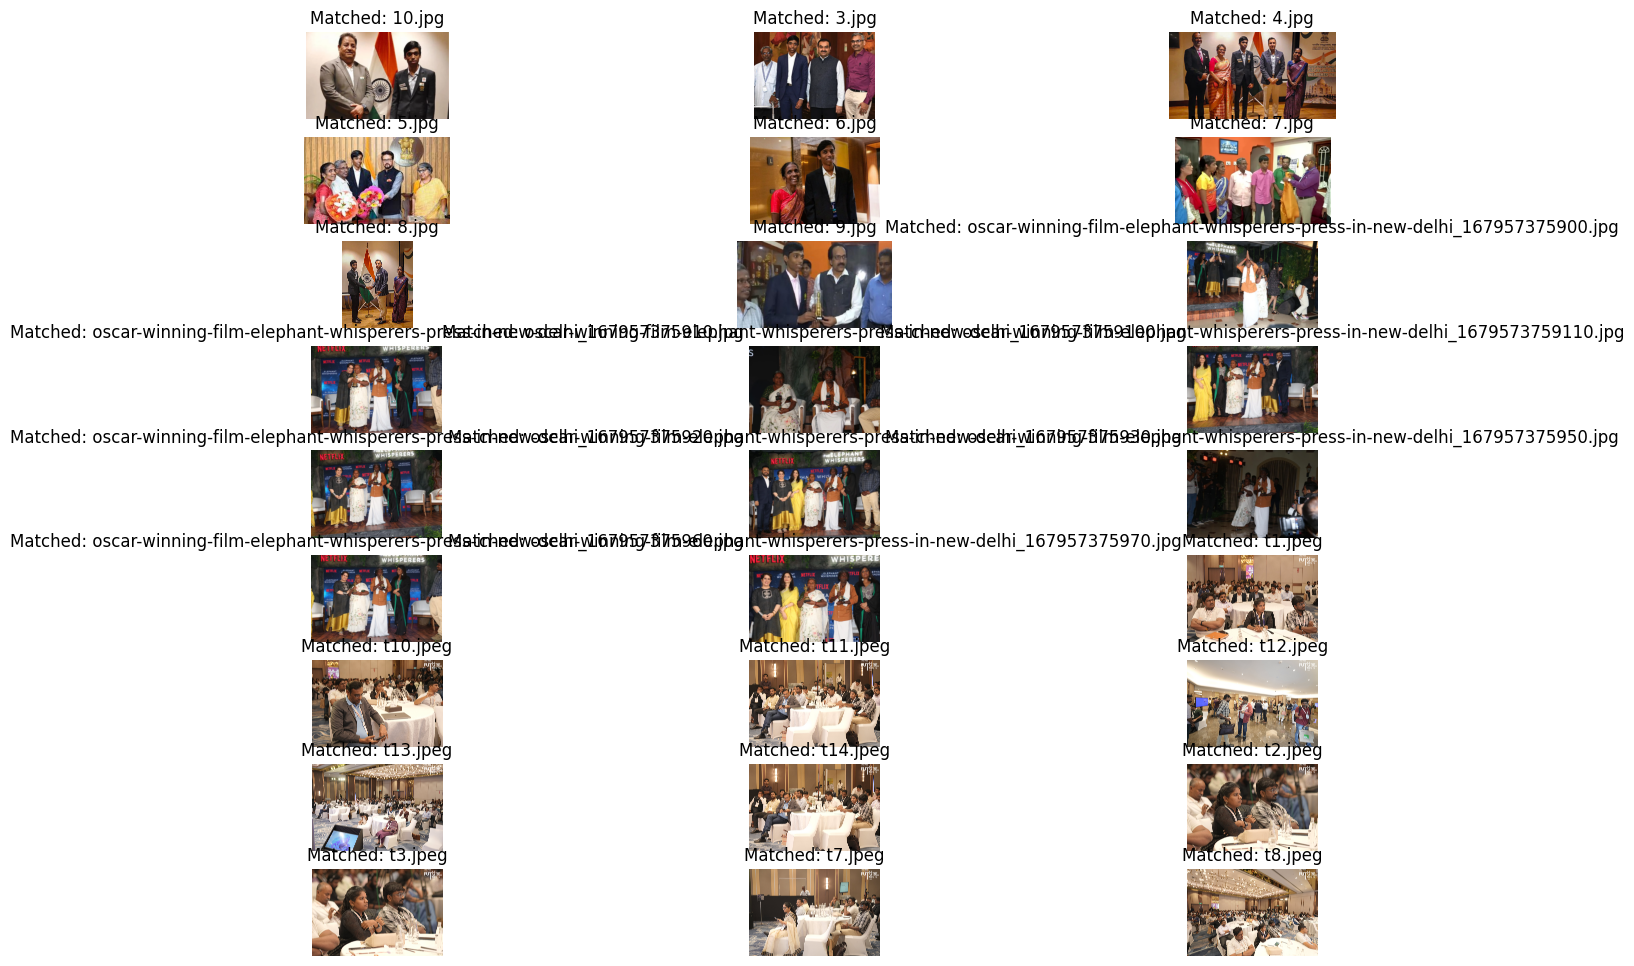

In [179]:
# Display matched images
plt.figure(figsize=(16, 12))
ncols = 3
nrows = len(result_paths) // ncols + (len(result_paths) % ncols != 0)

for i, (img, path) in enumerate(result_paths):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Matched: {os.path.basename(path)}')
    plt.axis('off')

In [50]:
np.expand_dims(faces[0], axis = 0).shape

(1, 224, 224, 3)

In [49]:
faces[0].shape

TensorShape([224, 224, 3])